In [117]:
import textaugment
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb
from textaugment import MIXUP
%matplotlib inline

# importing dependencies
import pandas as pd
import numpy as np
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
import keras
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet
from pywsd import disambiguate
from pywsd.similarity import max_similarity as maxsim
from nltk.wsd import lesk
import string

In [ ]:
tf.__version__

In [ ]:
textaugment.__version__

In [54]:
# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2
runs = 1

In [119]:
df_csv= pd.read_csv('ask_fm_data.csv')
df_csv.head(10100)

,Unnamed: 0,q_a,label
0,0,how to tell if a guy is gay if they seem super...,0
1,1,Idk I'm not gay,0
2,2,This person is 100% fake so beware Isabella!,1
3,3,Oof lmao how is she fake? Who's this lmao shit...,1
4,4,If your loved one left n cut all ties w you sh...,0
...,...,...,...
9993,9993,Basically anything omg,0
9994,9994,Why is it that when I ask someone so random as...,0
9995,9995,Thats when my bitch mode comes out,0
9996,9996,Post a picture of your favorite celebrity!,0


In [120]:
#marge all data from files that has been read
q_a=[]
label=[]
for i in range(len(df_csv)):
    label.append(int(df_csv['label'][i]))
    q_a.append(df_csv['q_a'][i])
print(len(q_a))
print(len(label))

9998
9998


In [149]:
import string
# text cleaning
w=list(string.ascii_lowercase)
QA=[]
for i in q_a:
    sen=i.replace('@USER','')
    sen=sen.replace('@user','')
    sen=sen.replace("#", ' ')
    sen=sen.replace("@", '')
    sen=sen.replace("pu**y", 'pussy')
    sen=sen.replace(" mofo ", ' motherfucker')
    sen=sen.replace("NEWLINE_TOKEN", " ")
    sen=sen.replace("TAB_TOKEN", " ")
    sen=sen.replace("??", '?')
    sen=sen.replace("? ?", '?')
    sen=sen.replace("??", '?')
    sen=sen.replace("? ?", '?')
    sen=sen.replace("? ?", '?')
    sen=sen.replace("? ?", '?')
    sen=sen.replace("?", ' ? ')
    sen=sen.replace("!", ' ! ')
    sen=sen.replace(" y ", ' why ')
    sen=sen.replace(" u ", ' you ')
    sen=sen.replace(" w ", ' with ')
    sen=sen.replace(" mf ", ' motherfucker ')
    sen=sen.replace(" IDGAF ", ' i dont give a fuck ')
    sen=sen.replace(" IDRC ", ' I Dont Really Care ')
    sen=sen.replace(" tf ", ' the fuck ')
    sen=sen.replace("wtf ", 'what the fuck ')
    sen=sen.replace(" yanno ", ' you know ')
    sen=sen.replace(" igt ", ' i know right ')
    sen=sen.replace(" r ", ' are ')
    sen=sen.replace(" tbh ", ' to be honest ')
    sen=sen.replace(" ik ", ' i know ')
    sen=sen.replace(" af ", ' as fuck ')
    sen=sen.replace(" hes ", ' he is ')
    sen=sen.replace(" des ", ' this ')
    sen=sen.replace(" bout ", ' about ')
    sen=sen.replace(" em ", ' them ')
    sen=sen.replace(" stg ", ' swear to god ')
    sen=sen.replace(" bj ", ' blow job ')
    sen=sen.replace(" ig ", ' i guess ')
    sen=sen.replace(" fagg ", ' faggot ')
    sen=sen.replace(" fag ", ' faggot ')
    sen=sen.replace(" fagot ", ' faggot ')
    sen=sen.replace(" tfw ", ' That Feel When ')
    sen=sen.replace(" wa ", ' was ')
    sen=sen.replace(" n ", ' and ')
    sen=sen.replace(" y0 ", ' you ')
    sen=sen.replace(" dat ", ' that ')
    sen=sen.replace(" yo ", ' you ')
    sen=sen.replace("youre ", ' you are ')
    sen=sen.replace(" v ", ' vagina ')
    sen=sen.replace(" pusy ", ' pussy ')
    sen=sen.replace(" pusy", ' pussy ')
    sen=sen.replace("pussie", 'pussy')
    sen=sen.replace(" v.", ' vagina ')
    sen=sen.replace(" doggystyle ", ' doggy style ')
    sen=sen.replace("di ck", 'dick')
    sen=sen.replace("r you", 'are you')
    sen=sen.replace("r u", 'are you')
    sen=sen.replace("f*ck", 'fuck')
    sen=sen.replace("f**", 'fuck')
    sen=sen.replace(" fxk ", 'fuck')
    sen=sen.replace(" wil ", 'will')
    sen=sen.replace(" il ", 'i will')
    sen=sen.replace(" asss ", ' ass ')
    sen=sen.replace(" lifeles ", ' lifeless ')
    sen=sen.replace(" ugler ", ' uglier ')
    sen=sen.replace(" you're ", ' you are ') 
    sen=sen.replace(",", ' ') 
    sen=sen.replace("?", '.') 
    sen=sen.lower()
    for s in w:
        n=s+s+s
        sen=sen.replace(n, s)
    sen=" ".join(sen.split())
    QA.append(sen)
# print(QA)
q_a=QA
print(len(q_a))

9998


In [150]:
# Read data files
comments_attack=pd.DataFrame()
comments_attack['comment']=q_a
comments_attack['label']=label

In [151]:
dataframe = comments_attack
dataframe['comment'] = dataframe['comment'].apply(lambda x: x.replace("NEWLINE_TOKEN", " "))
dataframe['comment'] = dataframe['comment'].apply(lambda x: x.replace("TAB_TOKEN", " "))
dataframe['comment'] = dataframe['comment'].apply(lambda x: x.lower())
dataframe['comment'] = dataframe['comment'].apply((lambda x: re.sub('[/(){}\[\]\|@,;]','',x)))
dataframe['comment'] = dataframe['comment'].apply((lambda x: re.sub('[^0-9a-z #+_]','',x)))
dataframe['comment'] = dataframe['comment'].apply((lambda x: re.sub(' +',' ',x)))

In [162]:
#split the data into training and validation sets
train_x, valid_x, train_y, valid_y = train_test_split(dataframe['comment'], dataframe['label'], test_size=0.3, random_state=42)

In [166]:
#split the data into numpy array
y_train=np.array(train_y)
y_test=np.array(valid_y)
print(len(y_train))
print(len(y_test))
print(len(train_y))
print(len(valid_y))

6998
3000
6998
3000


In [167]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'.')
count_vect.fit(dataframe['comment'])

# transform the training and validation data using count vectorizer object
x_train =  count_vect.transform(train_x).toarray()
x_test =  count_vect.transform(valid_x).toarray()

print(x_train)
print(len(x_train))


print(x_test)
print(len(x_test))


print(y_train)
print(len(y_train))
print(y_test)
print(len(y_test))

[[21  0  0 ...  0  5  0]
 [ 3  0  0 ...  0  0  0]
 [17  0  0 ...  0  2  0]
 ...
 [ 7  0  0 ...  1  3  0]
 [ 8  0  0 ...  0  2  0]
 [ 6  0  0 ...  0  2  0]]
6998
[[10  0  0 ...  0  1  0]
 [ 7  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  1  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 6  0  0 ...  0  2  0]
 [15  0  0 ...  0  2  0]]
3000
[0 0 0 ... 1 0 0]
6998
[0 0 0 ... 0 0 1]
3000


In [168]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (6998, 400)
x_test shape: (3000, 400)


In [172]:
from keras.optimizers import RMSprop             
print('Build model...')
model2 = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model2.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model2.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model2.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model2.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model2.add(Dense(hidden_dims))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
model2.summary()

Build model...
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 400, 50)           250000    
_________________________________________________________________
dropout_36 (Dropout)         (None, 400, 50)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_18 (Glo (None, 250)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_37 (Dropout)         (None, 250)               0         
_________________________________________________________________
activation_36 (Activation)   (None, 25

Train on 6998 samples, validate on 3000 samples
Epoch 1/2
6998/6998 [==============================] - 47s 7ms/sample - loss: 0.3736 - accuracy: 0.8803 - val_loss: 0.3898 - val_accuracy: 0.8763
Epoch 2/2
6998/6998 [==============================] - 44s 6ms/sample - loss: 0.3636 - accuracy: 0.8803 - val_loss: 0.3999 - val_accuracy: 0.8763


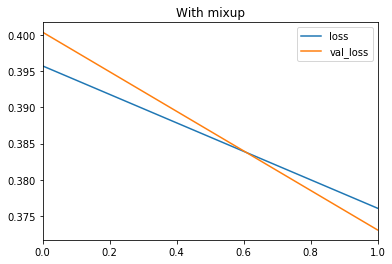

In [173]:
#run test with without mixup
h2 = model2.fit(x_train, y_train,          
          epochs=epochs,
          validation_data=(x_test, y_test))

pd.DataFrame(h1.history)[['loss','val_loss']].plot(title="With out mixup")

In [159]:
#use mixup function
mixup = MIXUP()
generator, step = mixup.flow(x_train, y_train, batch_size = batch_size, runs=runs)

In [145]:
#mixup data sperate 
aug_t=[]
aug_l=[]

for x in generator: 
    if len(aug_t) < 200000:
        for i in x[0]:
            aug_t.append(i)

        for j in x[1]:
            aug_l.append(j)
    else:
        break
        
#mixup data sperate 
f_t=[]
for i in aug_t:
    f_t.append(i)
ft=np.array(f_t)
print(len(ft))


f_l=[]
for j in aug_l:
    f_l.append(j)
fl=np.array(f_l)
print(len(fl))


200014
200014


In [160]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 400, 50)           250000    
_________________________________________________________________
dropout_30 (Dropout)         (None, 400, 50)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_15 (Glo (None, 250)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_31 (Dropout)         (None, 250)               0         
_________________________________________________________________
activation_30 (Activation)   (None, 25

In [161]:
#run test with mixup
h1 = model.fit(generator, steps_per_epoch=step,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train for 157 steps, validate on 4999 samples
Epoch 1/2
157/157 [==============================] - 49s 312ms/step - loss: 0.3947 - accuracy: 0.7644 - val_loss: 0.4004 - val_accuracy: 0.8832
Epoch 2/2
157/157 [==============================] - 47s 300ms/step - loss: 0.3750 - accuracy: 0.7698 - val_loss: 0.3731 - val_accuracy: 0.8832


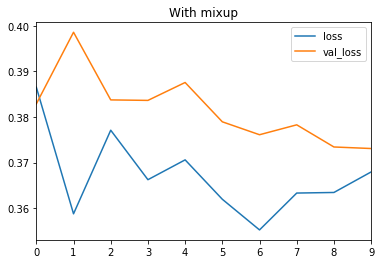

Build model...
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 400, 50)           250000    
_________________________________________________________________
dropout_20 (Dropout)         (None, 400, 50)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 250)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_21 (Dropout)         (None, 250)               0         
_________________________________________________________________
activation_20 (Activation)   (None, 25

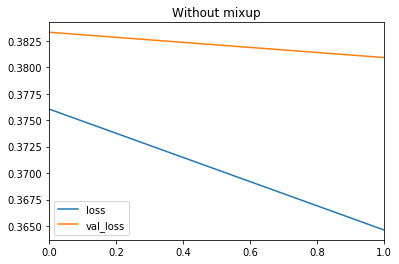

In [109]:
pd.DataFrame(h2.history)[['loss','val_loss']].plot(title="Without mixup")

Train on 7998 samples, validate on 2000 samples
Epoch 1/2
7998/7998 [==============================] - 13s 2ms/sample - loss: 0.3760 - accuracy: 0.8807 - val_loss: 0.3833 - val_accuracy: 0.8725
Epoch 2/2
7998/7998 [==============================] - 15s 2ms/sample - loss: 0.3646 - accuracy: 0.8807 - val_loss: 0.3809 - val_accuracy: 0.8725


In [110]:
print('Build model...')
model3 = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model3.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model3.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model3.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model3.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model3.add(Dense(hidden_dims))
model3.add(Dropout(0.2))
model3.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model3.summary()

Build model...
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 400, 50)           250000    
_________________________________________________________________
dropout_22 (Dropout)         (None, 400, 50)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 250)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_23 (Dropout)         (None, 250)               0         
_________________________________________________________________
activation_22 (Activation)   (None, 25

In [111]:
#run test with and without mixup
x_train1=np.concatenate((x_train,f_t), axis=0)
y_train1=np.concatenate((y_train,f_l), axis=0)

h3 = model3.fit(x_train1, y_train1,  
          epochs=epochs,
          validation_data=(x_test, y_test))

Train on 108006 samples, validate on 2000 samples
Epoch 1/2
108006/108006 [==============================] - 195s 2ms/sample - loss: 0.3640 - accuracy: 0.7864 - val_loss: 0.3699 - val_accuracy: 0.8725
Epoch 2/2
108006/108006 [==============================] - 194s 2ms/sample - loss: 0.3541 - accuracy: 0.7867 - val_loss: 0.3640 - val_accuracy: 0.8725


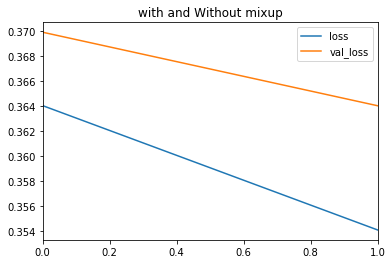

In [112]:
pd.DataFrame(h3.history)[['loss','val_loss']].plot(title="with and Without mixup")

In [116]:
def train_model(classifier, xtrain, ytrain, xvalid, yvalid):
   
    # fit the training dataset on the classifier
    classifier.fit(xtrain, ytrain)
    # predict the labels on validation dataset
    predictions = classifier.predict(xvalid)
        
    accuracy = metrics.accuracy_score(predictions, yvalid)
    f1score = metrics.f1_score(yvalid, predictions, average='weighted')
    return accuracy, f1score


# Linear Classifier on Count Vectors
accuracy, f1score = train_model(linear_model.LogisticRegression(), x_train, y_train, x_test, y_test)
print("LR, Count Vectors:   accuracy: %s   f1 score: %s"% (accuracy,f1score))

LR, Count Vectors:   accuracy: 0.872   f1 score: 0.8294273539197945


C:\Users\mjahan18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [176]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(dataframe['comment'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x).toarray()
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x).toarray()
print(xtrain_tfidf_ngram_chars)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [177]:
def train_model(classifier, xtrain, ytrain, xvalid, yvalid):
   
    # fit the training dataset on the classifier
    classifier.fit(xtrain, ytrain)
    # predict the labels on validation dataset
    predictions = classifier.predict(xvalid)
        
    accuracy = metrics.accuracy_score(predictions, yvalid)
    f1score = metrics.f1_score(yvalid, predictions, average='weighted')
    return accuracy, f1score

In [275]:
#use mixup function
mixup = MIXUP()
generator, step = mixup.flow(xtrain_tfidf_ngram_chars, y_train, batch_size = batch_size, runs=runs)

In [276]:
#mixup data sperate 
aug_t=[]
aug_l=[]

for x in generator: 
    if len(aug_t) < 10000:
        for i in x[0]:
            aug_t.append(i)

        for j in x[1]:
            aug_l.append(j)
    else:
        break
        


In [285]:
#mixup data sperate 
f_t=[]
for i in aug_t:
    
    n=[]
    for x in i:
        if x<.1:
            p=0
            n.append(p)
        else:
            p=1
            n.append(p)
        
    f_t.append(n)

ft=np.array(f_t)
print(ft)


f_l=[]
for j in aug_l:
    if j<.5:
        j=0
    else:
        j=1
    f_l.append(j)
fl=np.array(f_l)
print(fl)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 0 ... 0 0 0]


In [238]:
round(1.1)

1

In [291]:
# Linear Classifier on Character Level TF IDF Vectors
accuracy, f1score = train_model(linear_model.LogisticRegression(), ft, fl, xvalid_tfidf_ngram_chars, y_test)
print("LR, CharLevel Vectors only mixup applied:   accuracy: %s   f1 score: %s"% (accuracy,f1score))

C:\Users\mjahan18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR, CharLevel Vectors only mixup applied:   accuracy: 0.8763333333333333   f1 score: 0.818575353822467


C:\Users\mjahan18\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [290]:
# Linear Classifier on Character Level TF IDF Vectors
accuracy, f1score = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xvalid_tfidf_ngram_chars, y_test)
print("LR, CharLevel Vectors without mixup:   accuracy: %s   f1 score: %s"% (accuracy,f1score))

C:\Users\mjahan18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR, CharLevel Vectors without mixup:   accuracy: 0.9096666666666666   f1 score: 0.8904176806397655


In [288]:
#run test with and without mixup
x_train1=np.concatenate(( xtrain_tfidf_ngram_chars,ft), axis=0)
y_train1=np.concatenate((y_train,fl), axis=0)

In [289]:
# Linear Classifier on Character Level TF IDF Vectors
accuracy, f1score = train_model(linear_model.LogisticRegression(), x_train1, y_train1, xvalid_tfidf_ngram_chars, y_test)
print("LR, CharLevel Vectors with both mixup augmented data and original data together:   accuracy: %s   f1 score: %s"% (accuracy,f1score))

C:\Users\mjahan18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR, CharLevel Vectors with both mixup augmented data and original data together:   accuracy: 0.885   f1 score: 0.8385720001564473
